#Kaggle 
##Titanic - Machine Learning from Disaster
##Por: José Guarnizo
https://www.kaggle.com/c/titanic



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.model_selection import cross_val_score

In [ ]:
#Lectura del archivo train
df=pd.read_csv("https://raw.githubusercontent.com/JGuarnizo/Coding_Dojo/main/Advanced_Machine_Learning/Week10_Gradient_Boosting/titanic_train.csv")
df=df.drop(columns=["PassengerId","Name","Cabin", "Ticket"])
df.Embarked=df.Embarked.fillna("S")
df.Age=df.Age.fillna(df.Age.median())
#Lectura del archivo test
df2=pd.read_csv("https://raw.githubusercontent.com/JGuarnizo/Coding_Dojo/main/Advanced_Machine_Learning/Week10_Gradient_Boosting/titanic_test.csv")
df2=df2.drop(columns=["PassengerId","Name","Cabin","Ticket"])
df2.Fare=df2.Fare.fillna(df2.Fare.median())
df2.Age=df2.Age.fillna(df2.Age.median())

In [ ]:
X=df.drop(columns="Survived")
y=df.Survived.values
#Dummies para archivo train
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X = ohe.fit_transform(X)
#Dummies para archivo test
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
df2 = ohe.fit_transform(df2)
#Split_Train_Test del archivo train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35 ,random_state=8)

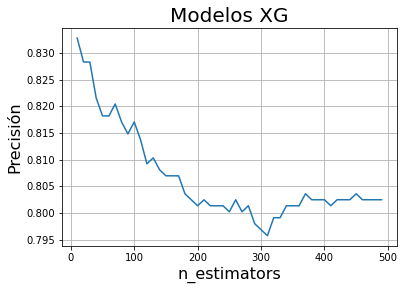

In [ ]:
#Búsqueda del n_estimator para lograr el mejor score
estimator_range = list(range(10, 500, 10))
scores_xg = []

#Determinación de n_estimator para XGBoost
for estimator in estimator_range:
    xg = XGBClassifier(n_estimators=estimator, random_state=8, n_jobs=-1, objective='binary:logistic', eval_metric="error" , 
     use_label_encoder=False )
    scores = cross_val_score(xg, X, y, cv=5)
    scores_xg.append(scores.mean())

#Gráfica 
plt.plot(estimator_range, scores_xg)
plt.xlabel('n_estimators', fontsize =16)
plt.ylabel('Precisión', fontsize = 16)
plt.title('Modelos XG', fontsize = 20)
plt.grid();

In [ ]:
xgb = XGBClassifier(n_estimators=10,objective='binary:logistic', 
eval_metric="error",random_state=8, n_jobs=-1, use_label_encoder=False )

scores = cross_val_score(xgb, X, y, cv=5)
scores.mean()


0.8328102441780176

In [ ]:
xgb.fit(X_train, y_train)
print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

Training accuracy: 0.8911917098445595
Testing accuracy: 0.8365384615384616


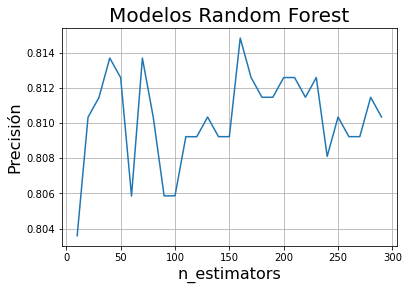

In [ ]:
#MODELO RANDOM FOREST. Sólo para comparar con XGBoost
#Búsqueda del n_estimator para lograr el mejor score
estimator_range_forest = list(range(10, 300, 10))
scores_forest = []
#En Random Forest no es necesario utilizar datos escalados
for estimator in estimator_range_forest:
    forest = RandomForestClassifier(n_estimators=estimator, random_state=8, n_jobs=-1)
    scores = cross_val_score(forest, X, y, cv=5)
    scores_forest.append(scores.mean())

#Gráfica de los distintos random forests con n_estimators variaando entre 10-300
plt.plot(estimator_range_forest, scores_forest)
plt.xlabel('n_estimators', fontsize =16)
plt.ylabel('Precisión', fontsize = 16)
plt.title('Modelos Random Forest', fontsize = 20)
plt.grid();

In [ ]:
#De la gráfica anterior, se concluye que n_estimators para mejor precisión es 160
forest = RandomForestClassifier(n_estimators=160, random_state=8, 
oob_score=True, n_jobs=-1)
forest.fit(X_train, y_train)
#Parámetros de medición, Precisión
print('Training accuracy:', forest.score(X_train,y_train))
print('Testing accuracy:', forest.score(X_test,y_test))

Training accuracy: 0.9827288428324698
Testing accuracy: 0.8333333333333334


In [ ]:
forest_feature=pd.DataFrame({'feature':X_train.columns, 'feature_importance':forest.feature_importances_})
forest_feature=forest_feature.sort_values(by='feature_importance',ascending=False)
forest_feature[0:15]

,feature,feature_importance
6,Fare,0.263937
3,Age,0.247604
2,Sex_female,0.150594
1,Sex_male,0.135286
0,Pclass,0.079129
4,SibSp,0.050730
5,Parch,0.038910
8,Embarked_C,0.014627
7,Embarked_S,0.013792
9,Embarked_Q,0.005392


In [ ]:
#Predicciones del modelo XGBoost
result=xgb.predict(df2)

In [ ]:
#Archivo de resultados
data=[]
indice = 892
for i in range(0,418):
  data.append([indice, result[i]])
  indice+=1

dp=pd.DataFrame(data, columns=['PassengerId','Survived'])
dp.to_csv(path_or_buf='Resultado_Titanic_JG.csv', index=False)